In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=b841d68644a7e79cc8d25360eedbd8a93ea63b4b2d8942cb43859c554ffc37b7
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=8f84163945900cae2ceec28fa766f31035d4b6bf7acd5f835b7eda65c830c7c9
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import yfinance as yf
import pandas as pd

In [3]:
Google = yf.download(tickers='GOOG', period = '10y', interval = '1d')['Adj Close']
Google.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-07-28    304.329285
2011-07-29    300.717834
2011-08-01    302.252075
2011-08-02    295.093903
2011-08-03    299.462555
Name: Adj Close, dtype: float64

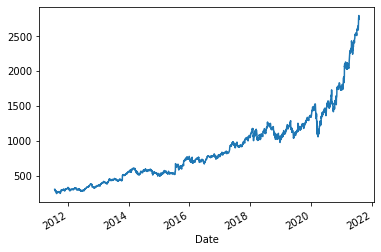

In [4]:
import matplotlib.pyplot as plt
Google.plot()
plt.show()

In [5]:
pip install Prophet

     |████████████████████████████████| 65 kB 730 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.1 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6643020 sha256=1f63596edf9602bf37024ade9efa77d80023702b500e13a9d0abf1026ab83b8e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [13]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
Google = yf.download(tickers='Goog', period = '10y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [14]:
modelfb = Prophet()
Google = Google.reset_index()
Google[['ds','y']] = Google[['Date','Adj Close']]
modelfb.fit(Google)
future = modelfb.make_future_dataframe(periods=180)


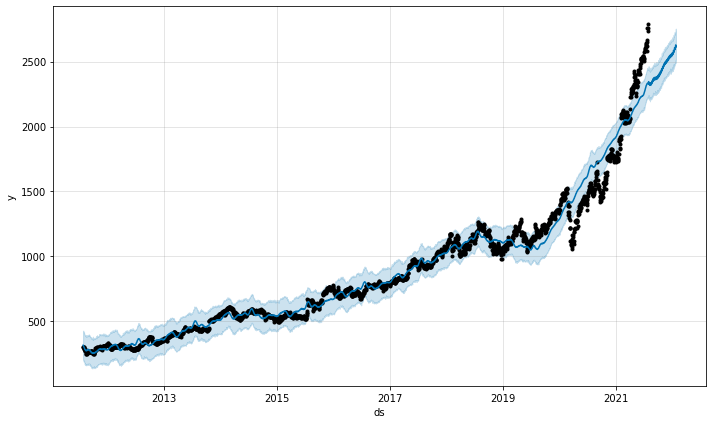

In [15]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [18]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()